In [113]:
import pandas as pd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [115]:
df=pd.read_csv("/Users/sagar/Downloads/force2020_data.csv")

In [117]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [119]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [121]:
df.isnull().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [123]:
df.fillna(df.mean(),inplace=True)

In [125]:
df.isnull().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

In [127]:
df.duplicated().sum()

0

<Axes: >

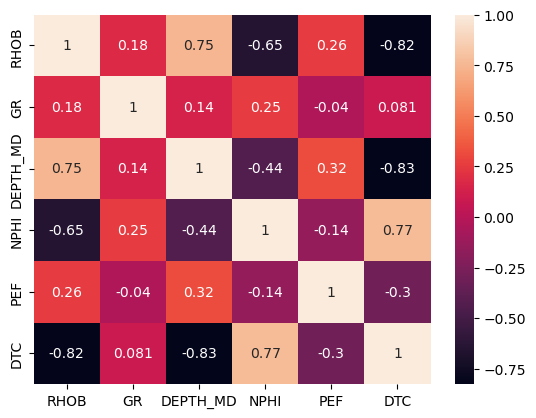

In [130]:
sns.heatmap(df.corr(),annot=True)


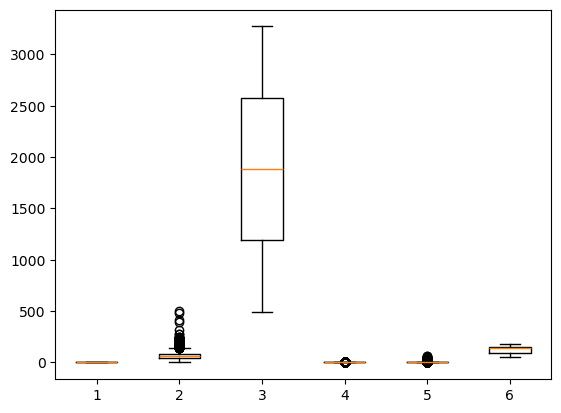

In [132]:
plt.boxplot(df)
plt.show()

In [134]:
#REMOVING OUTLIERS

In [136]:
def remove_outliers (df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    df[column_name] =   df[column_name].clip(upper = upper_bound)
    df[column_name] =   df[column_name].clip(lower = lower_bound)
    return df[column_name]
for col in df:
    df[col] = remove_outliers(df,col)

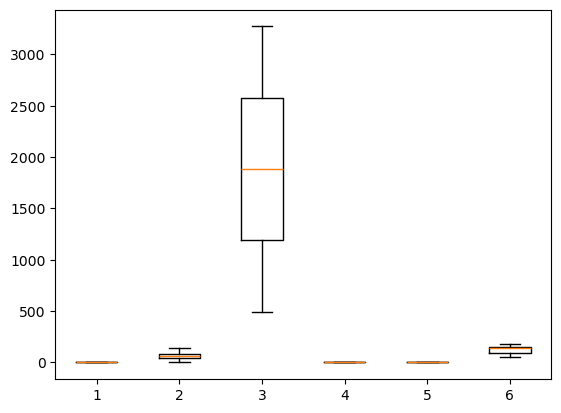

In [138]:
plt.boxplot(df)
plt.show()

In [140]:
#Ploting histogram to identify suitable scaling for each coloumns

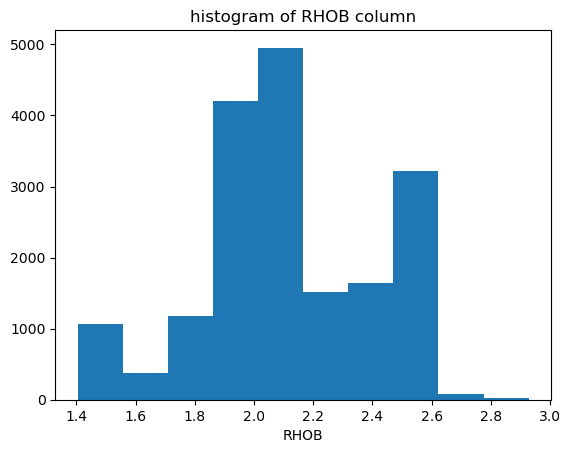

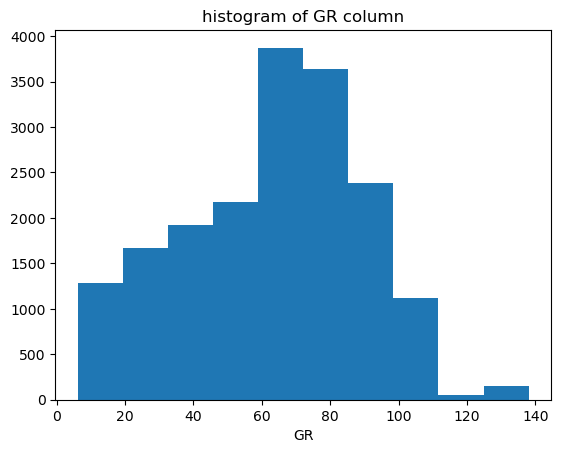

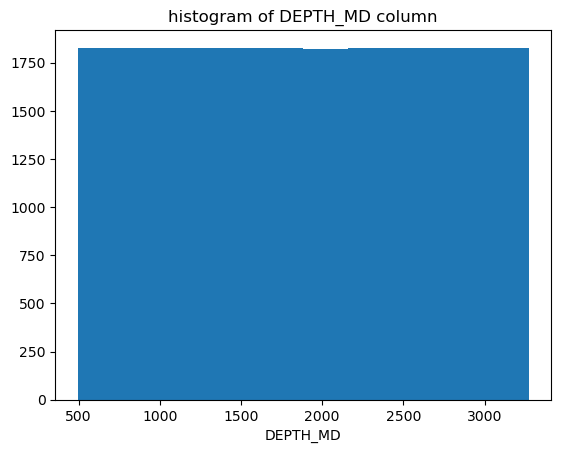

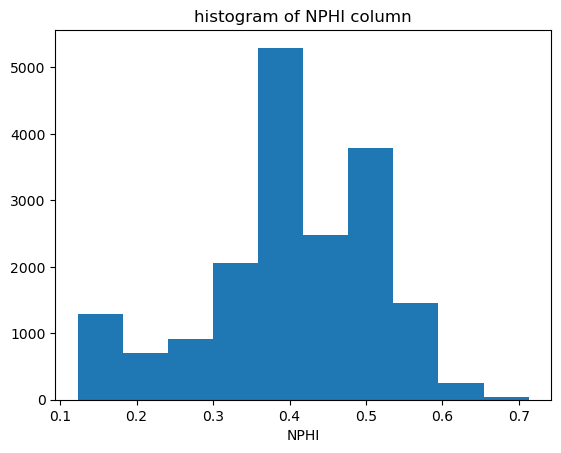

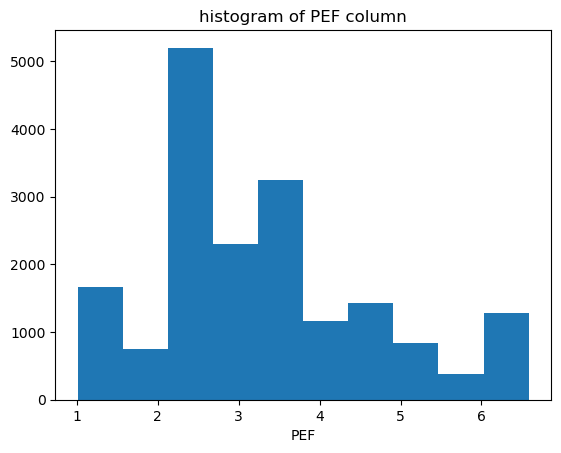

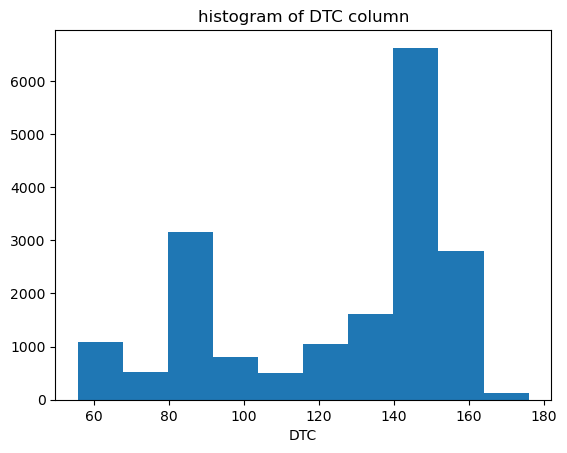

In [142]:
for column_name in df:
    plt.hist(df[column_name])
    plt.title("histogram of {} column".format(column_name)) 
    plt.xlabel(column_name)
    plt.show()

In [143]:
#Here we use standard scaler

In [146]:

std_scaler= StandardScaler()

In [148]:
std_cols=df.columns
df[std_cols]= std_scaler.fit_transform(df[std_cols])
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-0.759999,0.648114,-1.731721,-0.008241,2.358218,1.179232
1,-0.741163,0.612133,-1.731532,-0.008241,2.358218,1.161958
2,-0.718560,0.441774,-1.731342,-0.008241,2.358218,1.147887
3,-0.734045,0.367235,-1.731152,-0.008241,2.358218,1.147096
4,-0.773944,0.323128,-1.730963,-0.008241,2.358218,1.146405


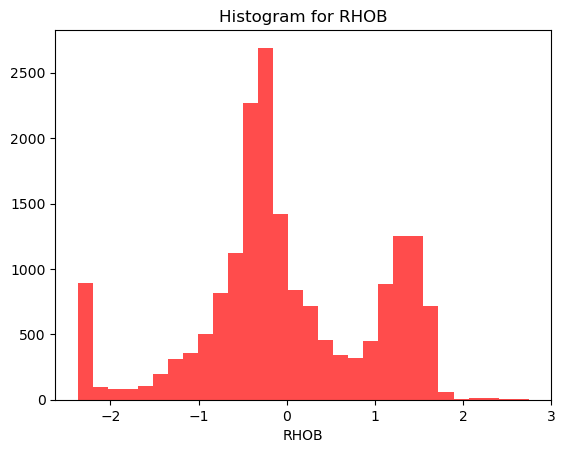

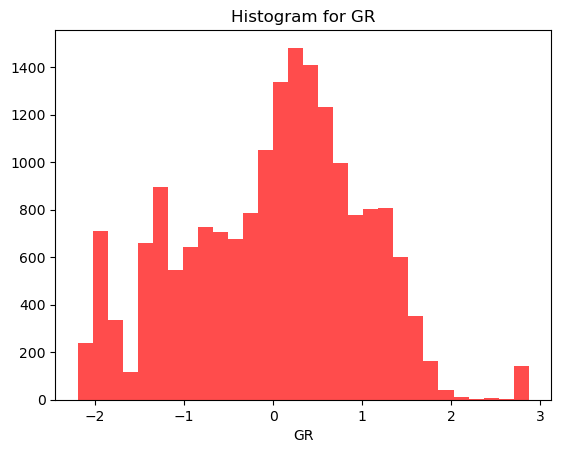

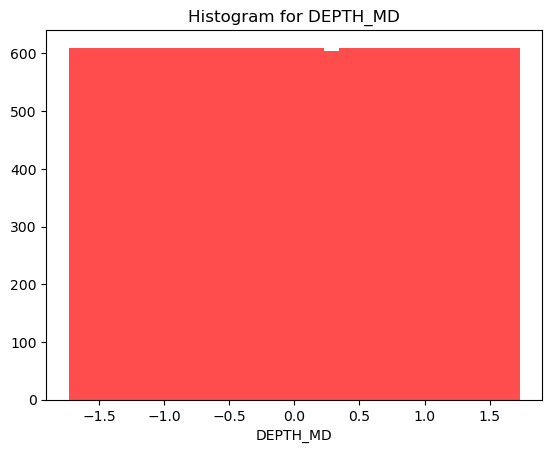

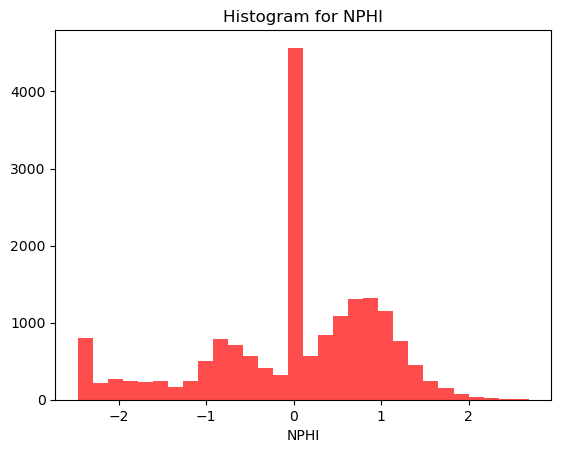

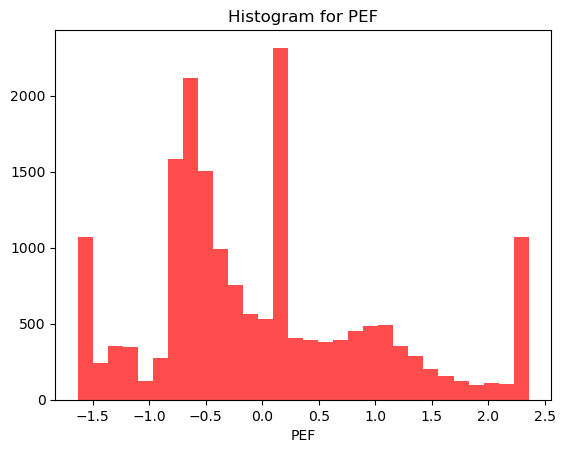

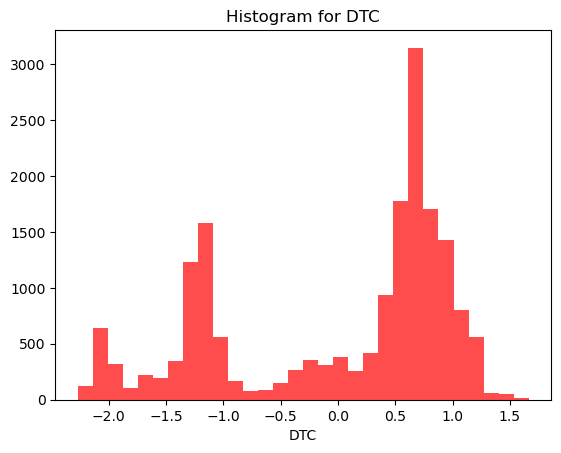

In [150]:
for col in std_cols:
    plt.hist(df[col], bins=30, color='r', alpha=0.7)
    plt.xlabel(col)
    plt.title(f"Histogram for {col}")
    plt.show()

## K means Clustering

<function matplotlib.pyplot.show(close=None, block=None)>

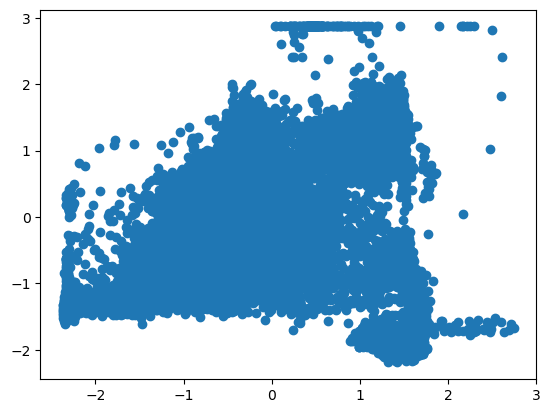

In [153]:
plt.scatter(df[['RHOB']],df[['GR']])
plt.show

In [158]:
x=df

In [160]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

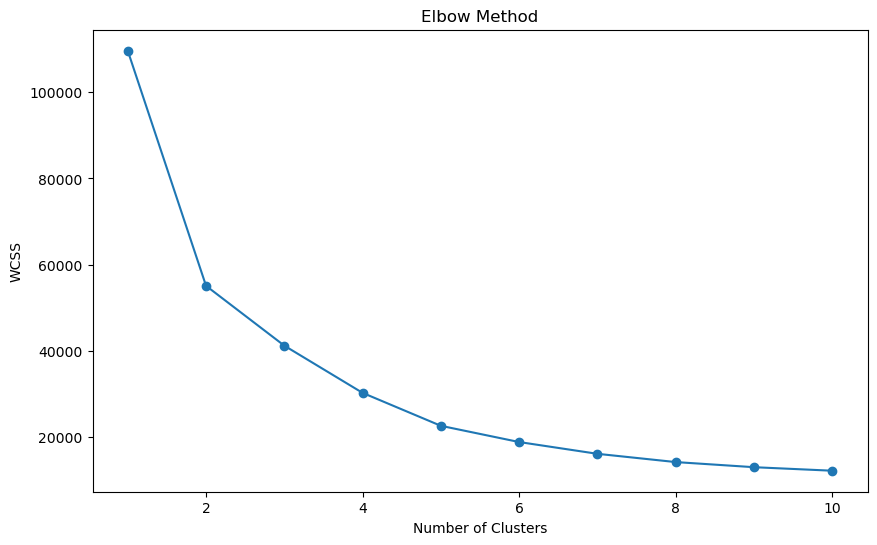

In [161]:
# plotting the elbow method
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [162]:
# applying k means clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

In [163]:
# Adding cluster labels to the dataset
df['Cluster'] = y_kmeans
df


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
0,-0.759999,0.648114,-1.731721,-0.008241,2.358218,1.179232e+00,1
1,-0.741163,0.612133,-1.731532,-0.008241,2.358218,1.161958e+00,1
2,-0.718560,0.441774,-1.731342,-0.008241,2.358218,1.147887e+00,1
3,-0.734045,0.367235,-1.731152,-0.008241,2.358218,1.147096e+00,1
4,-0.773944,0.323128,-1.730963,-0.008241,2.358218,1.146405e+00,1
...,...,...,...,...,...,...,...
18265,1.745819,-1.683564,1.731081,-1.901628,0.124652,4.651740e-16,0
18266,1.789158,-1.605864,1.731271,-1.921165,0.124652,4.651740e-16,0
18267,1.917421,-1.559734,1.731461,-2.004161,0.124652,4.651740e-16,0
18268,2.109002,-1.574822,1.731650,-2.016885,0.124652,4.651740e-16,0


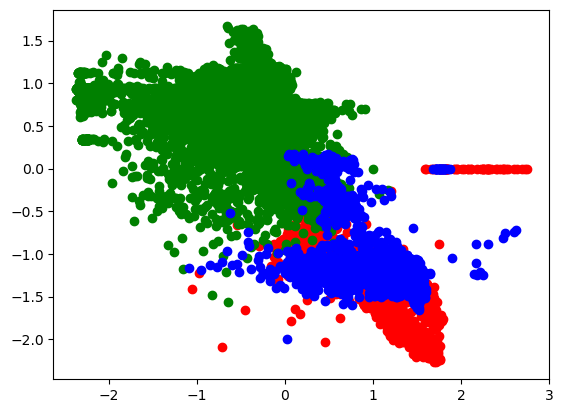

In [164]:
# assigning custom colors to clusters
colors = ['r','g','b','y','m']

for i in range(5):
  cluster_df = x[y_kmeans ==i]
  plt.scatter(cluster_df['RHOB'],
              cluster_df['DTC'],
              c=colors[i],
              )
  
plt.show()

In [165]:
df['Cluster'].value_counts()

Cluster
1    12304
2     3543
0     2423
Name: count, dtype: int64

In [166]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(x, y_kmeans)
print(silhouette_avg1)

0.5364082236822845
